# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df=pd.read_csv("class_data.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.051786,0.260052,-0.143894,7.300212,0.960782,1.716721,10.379783,1.307553,2.963135,False
1,3.716080,-2.045396,-0.390888,6.635246,-0.001133,2.071157,15.180013,-0.637435,4.500656,False
2,8.099124,0.851044,-0.244666,9.275884,-0.001133,-0.090422,16.868637,0.002672,3.055934,False
3,8.316766,0.549745,-0.003657,8.059333,0.640702,-0.776798,18.436525,2.154434,4.628770,False
4,9.092223,-0.466673,-0.465295,6.546600,-0.645921,-0.340904,11.558279,-2.180838,4.075076,False
...,...,...,...,...,...,...,...,...,...,...
3168,6.069616,-0.296897,0.467229,7.747548,0.332854,-0.124148,12.067619,-0.377939,3.669712,True
3169,4.668102,-0.082362,2.917703,7.166639,0.724984,1.246841,13.894419,0.019648,4.435821,True
3170,7.808856,-0.086288,-0.539485,8.061362,-0.062391,-0.414841,19.903225,0.018435,2.798243,True
3171,9.419510,-0.629769,1.269127,7.350233,-0.062391,0.076256,11.039070,0.219951,3.298876,True


### Split dataset

In [3]:
X_train_chose =df[['ph','Sulfate','Hardness','Chloramines','Solids']]
y_train_chose = df['Potability']

## Label Encode

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train_chose= label_encoder.fit_transform(y_train_chose)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_chose,y_train_chose,test_size=0.2)

## Modeling

In [6]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.num_iterations):
            for j in range(n_samples):
                if y[j] * (np.dot(X[j], self.weights) - self.bias) >= 1:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(X[j], y[j]))
                    self.bias -= self.learning_rate * y[j]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) - self.bias
        return np.sign(linear_output)

In [7]:
clf = SVM()
clf.fit(X_train.values, y_train)
predictions = clf.predict(X_test.values)

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
accuracy

0.4125984251968504

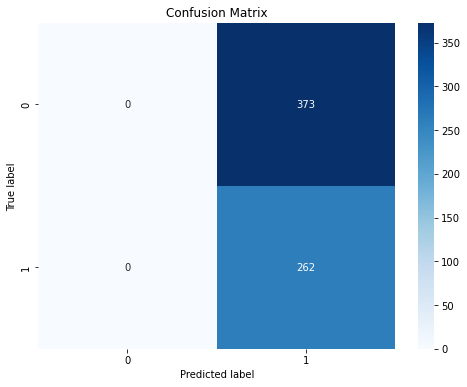

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', ax=ax)

# Set plot labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()